<a href="https://colab.research.google.com/github/srivatsan88/End-to-End-Time-Series/blob/master/Granger_Causality_Test_For_usefulness_of_TimeSeries_in_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![link text](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7d/GrangerCausalityIllustration.svg/540px-GrangerCausalityIllustration.svg.png)

Image Source: Wikipedia

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/appliance_energy_usage.csv', index_col=0, parse_dates=True)

In [ ]:
df

,Appliances,lights,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint,Visibility
date,,,,,,,,
2016-01-11 17:00:00,60,30,6.600000,733.5,92.000000,7.000000,5.300000,63.000000
2016-01-11 17:10:00,60,30,6.483333,733.6,92.000000,6.666667,5.200000,59.166667
2016-01-11 17:20:00,50,30,6.366667,733.7,92.000000,6.333333,5.100000,55.333333
2016-01-11 17:30:00,50,40,6.250000,733.8,92.000000,6.000000,5.000000,51.500000
2016-01-11 17:40:00,60,40,6.133333,733.9,92.000000,5.666667,4.900000,47.666667
...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,22.733333,755.2,55.666667,3.333333,13.333333,23.666667
2016-05-27 17:30:00,90,0,22.600000,755.2,56.000000,3.500000,13.300000,24.500000
2016-05-27 17:40:00,270,10,22.466667,755.2,56.333333,3.666667,13.266667,25.333333


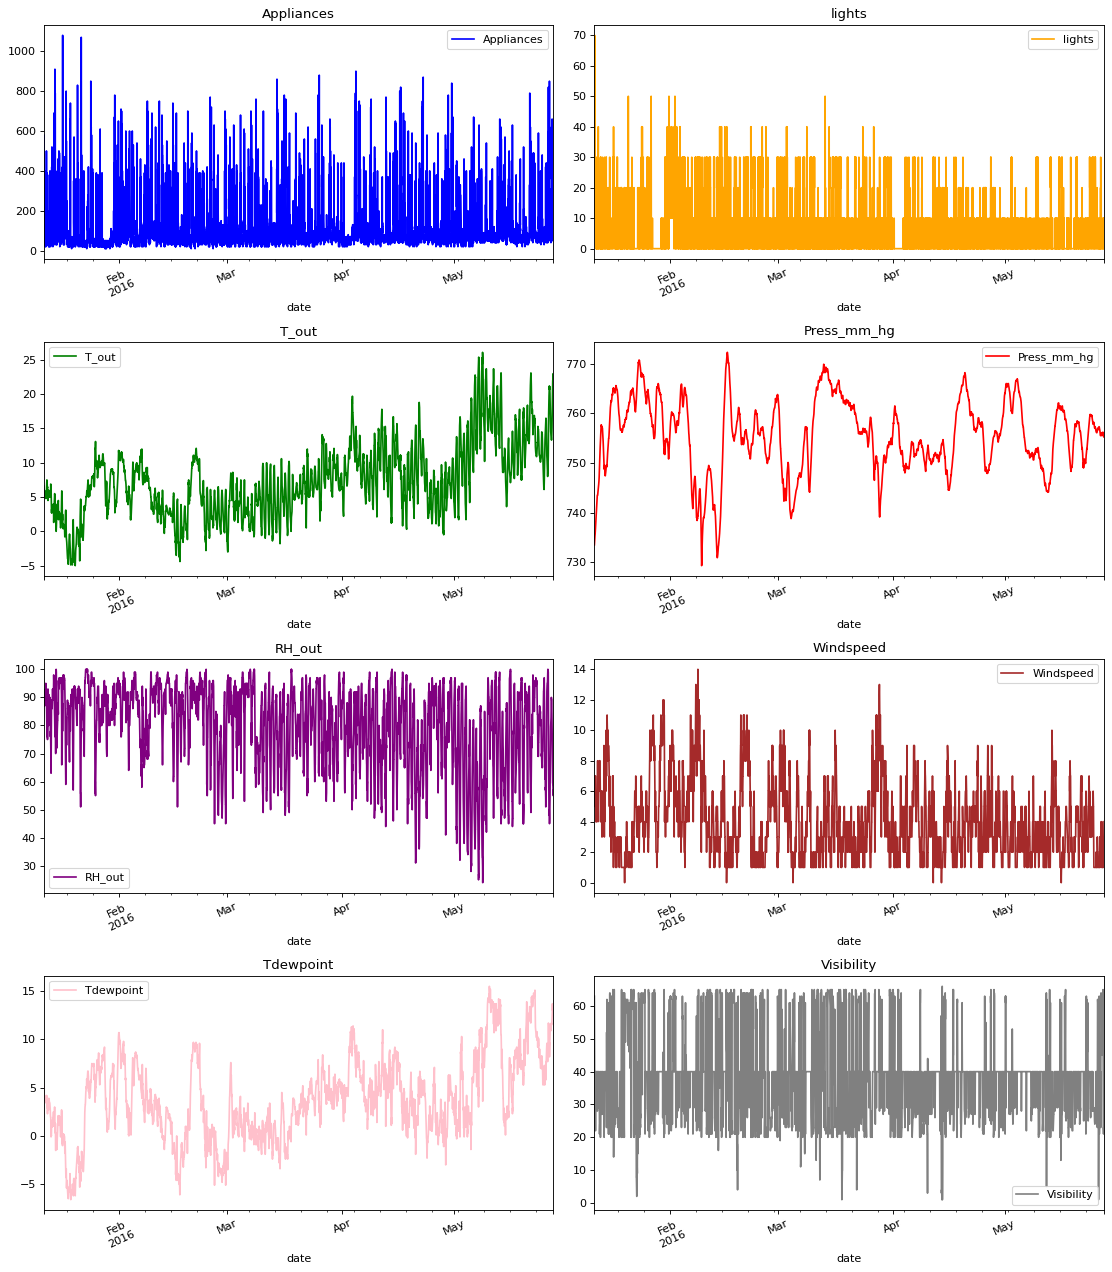

In [ ]:
color_list = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]


def Visualize(data):
    features= list(df.select_dtypes(include=[np.number]).columns.values)
    feature_size=len(features)
    fig, axes = plt.subplots(
        nrows=int(np.ceil(feature_size/2)), ncols=2, figsize=(14, feature_size*2), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(feature_size):
        key = features[i]
        c = color_list[i % (len(color_list))]
        t_data = data[key]
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{}".format(key),
            rot=25,
        )
        ax.legend([key])
    plt.tight_layout()


Visualize(df)

In [ ]:
df[['Appliances','T_out','lights']].corr(method='spearman')

,Appliances,T_out,lights
Appliances,1.000000,0.215504,0.302420
T_out,0.215504,1.000000,-0.072943
lights,0.302420,-0.072943,1.000000


In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Null Hypothesis - Series possesses a unit root and hence is not stationary

Alternate Hypothesis - Series is stationary

In [ ]:
result = adfuller(df['T_out'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critial Values: {result[4]}')

if result[1] > 0.05 :
  print('Series is not Stationary')
else:
  print('Series is Stationary')

Test Statistics: -7.376706875075805
p-value: 8.684210164027032e-11
Critial Values: {'1%': -3.430682172927125, '5%': -2.8616868086315823, '10%': -2.5668481422453397}
Series is Stationary


 H0: Xt does not granger causes Yt
 
 H1: Xt granger causes Yt

In [ ]:
max_lags=4

In [ ]:
results=grangercausalitytests(df[['Appliances','T_out']], max_lags, verbose=False)

In [ ]:
results

{1: ({'lrtest': (25.437220550869824, 4.570149887657645e-07, 1),
   'params_ftest': (25.44975243911685, 4.5808497276304875e-07, 19731.0, 1.0),
   'ssr_chi2test': (25.453621946849044, 4.5314611681095215e-07, 1),
   'ssr_ftest': (25.449752439104007, 4.580849727654541e-07, 19731.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (40.45919632949517, 1.6383140130210096e-09, 2),
   'params_ftest': (20.2452199516066, 1.64673329057097e-09, 19728.0, 2.0),
   'ssr_chi2test': (40.50070207879998, 1.6046646557857495e-09, 2),
   'ssr_ftest': (20.245219951618253, 1.6467332905524009e-09, 19728.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (36.095717710326426, 7.147428964923197e-08, 3),
   'params_ftest': (12.038645321089424, 7.188925511789674e-08, 19725.0, 3.0),
   'ssr_chi2test': (36.128752771742136, 7.033392227851859e-08, 3),
   'ssr_ftest': (12.038645321011785, 7.188925512605249e-08, 19725.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0

In [ ]:
p_values=[round(results[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]

In [ ]:
print('P Values per lag - '+str(p_values))

P Values per lag - [0.0, 0.0, 0.0, 0.0]


In [ ]:
results=grangercausalitytests(df[['lights','T_out']], max_lags, verbose=False)
p_values=[round(results[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]

In [ ]:
print('P Values per lag - '+str(p_values))

P Values per lag - [0.0012, 0.0221, 0.0713, 0.1423]


In [ ]:
results=grangercausalitytests(df[['Appliances','Visibility']], max_lags, verbose=False)
p_values=[round(results[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]

In [ ]:
print('P Values per lag - '+str(p_values))

P Values per lag - [0.822, 0.8877, 0.9698, 0.705]


In [ ]:
results=grangercausalitytests(df[['T_out', 'Appliances']], max_lags, verbose=False)
p_values=[round(results[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]

In [ ]:
print('P Values per lag - '+str(p_values))

P Values per lag - [0.0, 0.4234, 0.3364, 0.4985]
